# Lista 4

### Zaimplementowane biblioteki

In [6]:
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math
import collections

### Zadanie 1

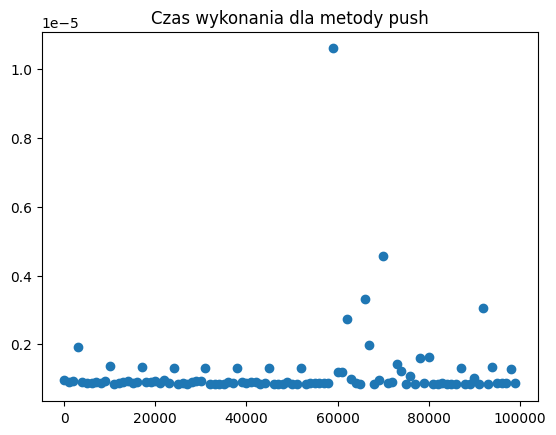

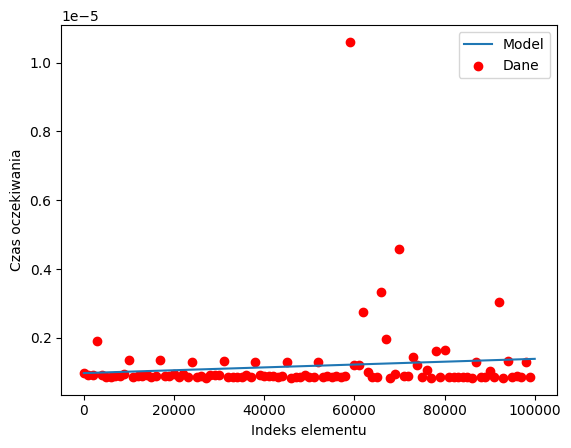

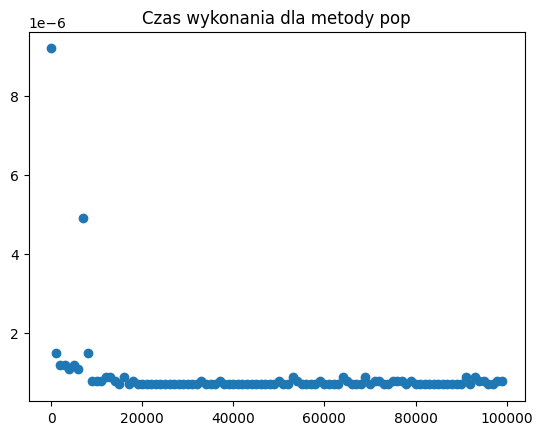

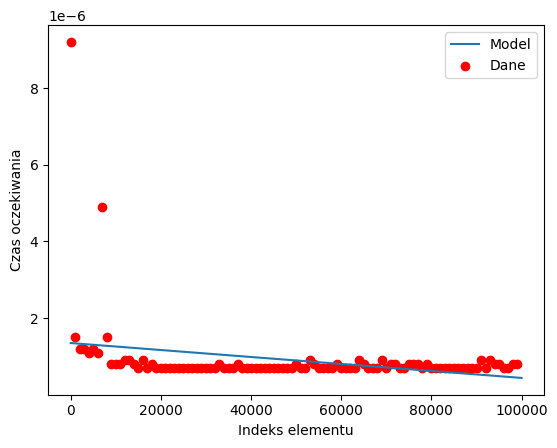

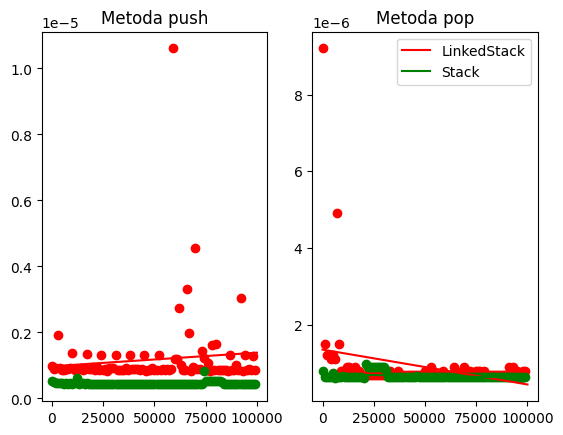

In [2]:
class Empty(Exception):
 pass
class LinkedStack:
 #--- -Node class- ---
    class _Node:
        __slots__ = '_element', '_next' #faster memory access

        def __init__(self,element,next):
            self._element = element
            self._next = next

    #--- -Stack methods- ---
    def __init__(self): #empty stack
        self._head = None
        self._size = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def push(self,e):
        self._head = self._Node(e,self._head)
        self._size += 1

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        return self._head._element

    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty!')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        return answer


ls = LinkedStack()
czas_push_ls = []
czas_pop_ls = []
for i in range(1, 100000, 1000):
    lista_indeks = []
    for j in range(1, 100000, 1000):
        start = time.perf_counter()
        ls.push(i)
        end = time.perf_counter()
        lista_indeks.append(end-start)
    czas_push_ls.append(sum(lista_indeks)/len(lista_indeks))
for i in range(1, 100000, 1000):
    start = time.perf_counter()
    ls.pop()
    end = time.perf_counter()
    czas_pop_ls.append(end-start)

###analiza push
rozmiar_tab = [i for i in range(1, 100000, 1000)]
plt.scatter(rozmiar_tab, czas_push_ls)
plt.title('Czas wykonania dla metody push')
plt.show()

def wykres(x, a, b):
    return a*x + b

popt_push_1, pcov = curve_fit(wykres, rozmiar_tab, czas_push_ls)

x = np.linspace(1, 100000)

plt.plot(x, wykres(x, *popt_push_1), label = 'Model')
plt.scatter(rozmiar_tab, czas_push_ls, c = 'r', label = 'Dane')
plt.legend()
plt.xlabel('Indeks elementu')
plt.ylabel('Czas oczekiwania')
plt.show()

###analiza pop
rozmiar_tab = [i for i in range(1, 100000, 1000)]
plt.scatter(rozmiar_tab, czas_pop_ls)
plt.title('Czas wykonania dla metody pop')
plt.show()


popt_pop_1, pcov = curve_fit(wykres, rozmiar_tab, czas_pop_ls)

plt.plot(x, wykres(x, *popt_pop_1), label = 'Model')
plt.scatter(rozmiar_tab, czas_pop_ls, c = 'r', label = 'Dane')
plt.legend()
plt.xlabel('Indeks elementu')
plt.ylabel('Czas oczekiwania')
plt.show()


##############################Stack

class Empty(Exception):
    pass
class Stack:
    def __init__(self):
        self._data = [] #nowy pusty stos

    def __len__(self):
        return len(self._data)

    def is_empty(self):
        return len(self._data)==0

    def push(self,e):
        self._data.append(e)

    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]

    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop() 


s = Stack()
czas_push_s = []
czas_pop_s = []
for i in range(1, 100000, 1000):
    lista_indeks = []
    for j in range(1, 100000, 1000):
        start = time.perf_counter()
        s.push(i)
        end = time.perf_counter()
        lista_indeks.append(end-start)
    czas_push_s.append(sum(lista_indeks)/len(lista_indeks))
for i in range(1, 100000, 1000):
    lista_indeks = []
    for j in range(1, 100000, 1000):
        start = time.perf_counter()
        s.pop()
        end = time.perf_counter()
        lista_indeks.append(end-start)
    czas_pop_s.append(sum(lista_indeks)/len(lista_indeks))
rozmiar_tab = [i for i in range(1, 100000, 1000)]

popt_push_2, pcov = curve_fit(wykres, rozmiar_tab, czas_push_s)
popt_pop_2, pcov = curve_fit(wykres, rozmiar_tab, czas_pop_s)

fig, (ax1, ax2)= plt.subplots(1, 2)

ax1.plot(x, wykres(x, *popt_push_1),c = 'r', label = 'LinkedStack')
ax1.scatter(rozmiar_tab, czas_push_ls, c = 'r')
ax1.plot(x, wykres(x, *popt_push_2),c = 'g', label = "Stack")
ax1.scatter(rozmiar_tab, czas_push_s, c = 'g')
ax1.title.set_text('Metoda push')
ax2.plot(x, wykres(x, *popt_pop_1), c = 'r', label = 'LinkedStack')
ax2.scatter(rozmiar_tab, czas_pop_ls, c = 'r')
ax2.plot(x, wykres(x, *popt_pop_2), c = 'g', label = 'Stack')
ax2.scatter(rozmiar_tab, czas_pop_s, c = 'g')
ax2.title.set_text('Metoda pop')
plt.legend()
plt.show()

### Zadanie 2

In [5]:
class Empty(Exception):
    pass

class ArrayBinaryTree:
    def __init__(self):
        self._size = 0
        self._tree = [None]

    def root(self, val):
        if self._tree[0] == None:
            self._tree[0] = val
            self._size += 1
            for i in range(2**(self._size)):
                self._tree.append(None)
        else:
            raise Empty("Tree already has a root")

    def _is_root(self, p):
        return self._tree[p] == self._tree[0]

    def _parent(self, p):
        if self._tree[p] == None:
            raise Empty('Node does not exist')
        else:
            if self._tree[p] == self._tree[0]:
                return None
            else:
                return self._tree[math.floor((p-1)/2)]

    def _children(self, p):
        list_child = []
        if self._tree[2*p+1] != None:
            list_child.append(self._tree[2*p+1])
        if self._tree[2*p+2] != None:
            list_child.append(self._tree[2*p+2])
        return list_child

    def _num_children(self, p):
        return len(self._children(p))

    def _is_leaf(self, p):
        return self._num_children(p) == 0

    def __len__(self):
        return self._size

    def _is_empty(self):
        return self.__len__() == 0
    
    def _element(self, p):
        return self._tree[p]

    def _left(self, p):
        return self._tree[2*p+1]

    def _right(self, p):
        return self._tree[2*p+2]

    def _sibling(self, p):
        if p%2 == 1:
            return self._tree[p+1]
        else:
            return self._tree[p-1]

    def _add_left(self, p, val):
        if self._tree[p] == None:
            raise Empty('Node does not exist')
        else:
            self._tree[2*p+1] = val
            self._size += 1
        for i in range(2**(self._size)+1):
            self._tree.append(None)

    def _add_right(self, p, val):
        if self._tree[p] == None:
            raise Empty('Node does not exist')
        else:
            self._tree[2*p+2] = val
            self._size += 1
        for i in range(2**(self._size)+1):
            self._tree.append(None)

    def __str__(self):
        return f'{self._tree}'


t = ArrayBinaryTree()
t.root(1)
print(t)
t._add_left(0,2)
t._add_right(0,3)
print(t)
print(t._num_children(0))
t._add_right(1,4)
t._add_left(1,5)
print(t._is_leaf(1))  
print(t.__len__())
print(t._is_empty())
print(t._children(1))

[1, None, None]
[1, 2, 3, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
2
False
5
False
[5, 4]


### Zadanie 5

In [7]:
class Tree:
  #------------------------------- zagnieżdżona klasa Position -------------------------------
  class Position:

    def element(self):
      raise NotImplementedError('must be implemented by subclass')
      
    def __eq__(self, other):
      raise NotImplementedError('must be implemented by subclass')

    def __ne__(self, other):
      return not (self == other)            # opposite of __eq__

  # ---------- abstrakcyjne metody do zdefiniowania w podklasie ----------
  def root(self):
    raise NotImplementedError('must be implemented by subclass')

  def parent(self, p):
    raise NotImplementedError('must be implemented by subclass')

  def num_children(self, p):
    raise NotImplementedError('must be implemented by subclass')

  def children(self, p):
    raise NotImplementedError('must be implemented by subclass')

  def __len__(self):
    raise NotImplementedError('must be implemented by subclass')

  # ---------- konkretne metody ----------
  def is_root(self, p):
    return self.root() == p

  def is_leaf(self, p):
    return self.num_children(p) == 0

  def is_empty(self):
    return len(self) == 0

  def depth(self, p):
    if self.is_root(p):
      return 0
    else:
      return 1 + self.depth(self.parent(p))

  def _height1(self):                 # works, but O(n^2) worst-case time
    return max(self.depth(p) for p in self.positions() if self.is_leaf(p))

  def _height2(self, p):                  # time is linear in size of subtree
    if self.is_leaf(p):
      return 0
    else:
      return 1 + max(self._height2(c) for c in self.children(p))

  def height(self, p=None):
    if p is None:
      p = self.root()
    return self._height2(p)        # start _height2 recursion

  def __iter__(self):
    for p in self.positions():                        
      yield p.element()                               

  def positions(self):
    return self.preorder()                            # 

  def preorder(self):
    if not self.is_empty():
      for p in self._subtree_preorder(self.root()):  # 
        yield p

  def _subtree_preorder(self, p):
    yield p                                           
    for c in self.children(p):                        
      for other in self._subtree_preorder(c):         
        yield other                                   

  def postorder(self):
    if not self.is_empty():
      for p in self._subtree_postorder(self.root()):  # start recursion
        yield p

  def _subtree_postorder(self, p):
    for c in self.children(p):                        
      for other in self._subtree_postorder(c):        
        yield other                                   
    yield p  

class BinaryTree(Tree):
  # --------------------- dodatkowe metody abstrakcyjne ---------------------
  def left(self, p):
    raise NotImplementedError('must be implemented by subclass')

  def right(self, p):
    raise NotImplementedError('must be implemented by subclass')

  # ---------- metody konkretne zaimplemetowane w tej klasie ----------
  def sibling(self, p):
    parent = self.parent(p)
    if parent is None:                    # p must be the root
      return None                         # root has no sibling
    else:
      if p == self.left(parent):
        return self.right(parent)         # possibly None
      else:
        return self.left(parent)          # possibly None

  def children(self, p):
    if self.left(p) is not None:
      yield self.left(p)
    if self.right(p) is not None:
      yield self.right(p)

  def inorder(self):
    if not self.is_empty():
      for p in self._subtree_inorder(self.root()):
        yield p

  def _subtree_inorder(self, p):
    if self.left(p) is not None:          # if left child exists, traverse its subtree
      for other in self._subtree_inorder(self.left(p)):
        yield other
    yield p                               # visit p between its subtrees
    if self.right(p) is not None:         # if right child exists, traverse its subtree
      for other in self._subtree_inorder(self.right(p)):
        yield other

  def positions(self):
    return self.inorder()                 # make inorder the default

class LinkedBinaryTree(BinaryTree):
  #-------------------------- zagnieżdżona klasa Node --------------------------
  class _Node:
    __slots__ = '_element', '_parent', '_left', '_right' 

    def __init__(self, element, parent=None, left=None, right=None):
      self._element = element
      self._parent = parent
      self._left = left
      self._right = right

  #-------------------------- zagnieżdżona klasa Position --------------------------
  class Position(BinaryTree.Position):

    def __init__(self, container, node):
      self._container = container
      self._node = node

    def element(self):
      return self._node._element

    def __eq__(self, other):
      return type(other) is type(self) and other._node is self._node

  #------------------------------- metody użytkowe -------------------------------
  def _validate(self, p):
    if not isinstance(p, self.Position):
      raise TypeError('p must be proper Position type')
    if p._container is not self:
      raise ValueError('p does not belong to this container')
    if p._node._parent is p._node:      # convention for deprecated nodes
      raise ValueError('p is no longer valid')
    return p._node

  def _make_position(self, node):
    return self.Position(self, node) if node is not None else None

  #-------------------------- konstruktor drzewa --------------------------
  def __init__(self):
    self._root = None
    self._size = 0

  #-------------------------- metody publiczne --------------------------
  def __len__(self):
    return self._size
  
  def root(self):
    return self._make_position(self._root)

  def parent(self, p):
    node = self._validate(p)
    return self._make_position(node._parent)

  def left(self, p):
    node = self._validate(p)
    return self._make_position(node._left)

  def right(self, p):
    node = self._validate(p)
    return self._make_position(node._right)

  def num_children(self, p):
    node = self._validate(p)
    count = 0
    if node._left is not None:     # left child exists
      count += 1
    if node._right is not None:    # right child exists
      count += 1
    return count

  #-------------------------- metody niepubliczne --------------------------
  def _add_root(self, e):
    if self._root is not None:
      raise ValueError('Root exists')
    self._size = 1
    self._root = self._Node(e)
    return self._make_position(self._root)

  def _add_left(self, p, e):
    node = self._validate(p)
    if node._left is not None:
      raise ValueError('Left child exists')
    self._size += 1
    node._left = self._Node(e, node)                  # node is its parent
    return self._make_position(node._left)

  def _add_right(self, p, e):
    node = self._validate(p)
    if node._right is not None:
      raise ValueError('Right child exists')
    self._size += 1
    node._right = self._Node(e, node)                 # node is its parent
    return self._make_position(node._right)

  def _replace(self, p, e):
    node = self._validate(p)
    old = node._element
    node._element = e
    return old

  def _delete(self, p):
    node = self._validate(p)
    if self.num_children(p) == 2:
      raise ValueError('Position has two children')
    child = node._left if node._left else node._right  # might be None
    if child is not None:
      child._parent = node._parent   # child's grandparent becomes parent
    if node is self._root:
      self._root = child             # child becomes root
    else:
      parent = node._parent
      if node is parent._left:
        parent._left = child
      else:
        parent._right = child
    self._size -= 1
    node._parent = node              # convention for deprecated node
    return node._element
  
  def _attach(self, p, t1, t2):
    node = self._validate(p)
    if not self.is_leaf(p):
      raise ValueError('position must be leaf')
    if not type(self) is type(t1) is type(t2):    # all 3 trees must be same type
      raise TypeError('Tree types must match')
    self._size += len(t1) + len(t2)
    if not t1.is_empty():         # attached t1 as left subtree of node
      t1._root._parent = node
      node._left = t1._root
      t1._root = None             # set t1 instance to empty
      t1._size = 0
    if not t2.is_empty():         # attached t2 as right subtree of node
      t2._root._parent = node
      node._right = t2._root
      t2._root = None             # set t2 instance to empty
      t2._size = 0

class ExpressionTree(LinkedBinaryTree):

    def __init__(self, token, left=None, right=None):
        super().__init__()                        # LinkedBinaryTree initialization
        if not isinstance(token, str):
            raise TypeError('Token must be a string')
        self._add_root(token)                     # use inherited, nonpublic method
        if left is not None:                      # presumably three-parameter form
            if token not in '+-*/^':
                raise ValueError('token must be valid operator')
            self._attach(self.root(), left, right)  # use inherited, nonpublic method

    def __str__(self):
        pieces = []                 # sequence of piecewise strings to compose
        self._parenthesize_recur(self.root(), pieces)
        return ''.join(pieces)

    def _parenthesize_recur(self, p, result):
        if self.is_leaf(p):
            result.append(str(p.element()))                    # leaf value as a string
        else:
            result.append('(')                                 # opening parenthesis
            self._parenthesize_recur(self.left(p), result)     # left subtree
            result.append(p.element())                         # operator
            self._parenthesize_recur(self.right(p), result)    # right subtree
            result.append(')')                                 # closing parenthesis

    def evaluate(self, var=1):
        return self._evaluate_recur(self.root(), var)

    def _evaluate_recur(self, p, var):
        if self.is_leaf(p):
            try:
                return float(p.element())      # if not x
            except:
                return float(var)               #if x
        else:
            op = p.element()
            left_val = self._evaluate_recur(self.left(p), var)
            right_val = self._evaluate_recur(self.right(p), var)
            if op == '+':
                return left_val + right_val
            elif op == '-':
                return left_val - right_val
            elif op == '/':
                return left_val / right_val
            elif op =="*":
                return left_val * right_val
            elif op =="^":
                return left_val ** right_val

    def _add_simp(self, L, R):
        if L.root().element().isnumeric() and R.root().element().isnumeric():
            try:
                return ExpressionTree(str(int(L.root().element()) + int(R.root().element())))
            except:
                return ExpressionTree(str(float(L.root().element()) + float(R.root().element())))
        elif L.root().element() == '0' or L.root().element() == '0.0':
            return R
        elif R.root().element() == '0' or R.root().element() == '0.0':
            return L
        else:
            return ExpressionTree('+', L, R)

    def _sub_simp(self, L, R):
        if L.root().element().isnumeric() and R.root().element().isnumeric():
            try:
                return ExpressionTree(str(int(L.root().element()) - int(R.root().element())))
            except:
                return ExpressionTree(str(float(L.root().element()) - float(R.root().element())))
        elif L.root().element() == '0' or L.root().element() == '0.0':
            return ExpressionTree('*', ExpressionTree('-1'), R)
        elif R.root().element() == '0' or R.root().element() == '0.0':
            return L
        else:
            return ExpressionTree('-', L, R)
    
    def _mul_simp(self, L, R):
        if L.root().element().isnumeric() and R.root().element().isnumeric():
            try:
                return ExpressionTree(str(int(L.root().element()) * int(R.root().element())))
            except:
                return ExpressionTree(str(float(L.root().element()) * float(R.root().element())))
        elif L.root().element() == '0' or L.root().element() == '0.0':
            return ExpressionTree('0')
        elif R.root().element() == '0' or R.root().element() == '0.0':
            return ExpressionTree('0')
        elif L.root().element() == '1' or L.root().element() == '1.0':
            return R
        elif R.root().element() == '1' or R.root().element() == '1.0':
            return L
        else:
            return ExpressionTree('*', L, R)

    def _div_simp(self, L, R):
        if L.root().element().isnumeric() and R.root().element().isnumeric():
            try:
                try:
                    return ExpressionTree(str(int(int(L.root().element()) / int(R.root().element()))))
                except:
                    return ExpressionTree(str(int(L.root().element()) / int(R.root().element())))
            except:
                return ExpressionTree(str(float(L.root().element()) / float(R.root().element())))
        elif L.root().element() == '0' or L.root().element() == '0.0':
            return ExpressionTree('0')
        elif R.root().element() == '0' or R.root().element() == '0.0':
            raise ZeroDivisionError
        elif R.root().element() == '1' or R.root().element() == '1.0':
            return L
        else:
            return ExpressionTree('/', L, R)
    
    def _pov_simp(self, L, R):
        if L.root().element().isnumeric() and R.root().element().isnumeric():
            try:
                return ExpressionTree(str(int(L.root().element()) ** int(R.root().element())))
            except:
                return ExpressionTree(str(float(L.root().element()) ** float(R.root().element())))
        elif L.root().element() == '0' or L.root().element() == '0.0':
            return ExpressionTree('0')
        elif R.root().element() == '0' or R.root().element() == '0.0':
            raise ExpressionTree('1')
        elif R.root().element() == '1' or R.root().element() == '1.0':
            return L
        elif L.root().element() == '1' or L.root().element() == '1.0':
            return R
        else:
            return ExpressionTree('^', L, R)

    def _val_tree(self, p):
        if self.is_leaf(p):     return ExpressionTree(p.element())
        else:                   return ExpressionTree(p.element(), self._val_tree(self.left(p)), self._val_tree(self.right(p)))
    
    def derivative(self, var='x'):
        return self._calc_derivative(self.root(), var)

    def _calc_derivative(self, p, var):
        if self.is_leaf(p):
            if p.element() == var:      return ExpressionTree('1')
            else:                       return ExpressionTree('0')
    
        else:
            op = p.element()

            if op == '+':
                L = self._calc_derivative(self.left(p), var)
                R = self._calc_derivative(self.right(p), var)
                return self._add_simp(L, R)
            
            elif op == '-':
                L = self._calc_derivative(self.left(p), var)
                R = self._calc_derivative(self.right(p), var)
                return self._sub_simp(L, R)

            elif op == '*':   
                L_d = self._calc_derivative(self.left(p), var)
                L = self._val_tree(self.left(p))
                R_d = self._calc_derivative(self.right(p), var)
                R = self._val_tree(self.right(p))

                L_mul = self._mul_simp(L_d, R)
                R_mul = self._mul_simp(L, R_d)

                return self._add_simp(L_mul, R_mul)
            
            elif op == '/':

                L_d = self._calc_derivative(self.left(p), var)
                L = self._val_tree(self.left(p))
                R_d = self._calc_derivative(self.right(p), var)
                R = self._val_tree(self.right(p))

                U_1 = self._mul_simp(L_d, R)
                U_2 = self._mul_simp(L, R_d)
                U = self._sub_simp(U_1, U_2)

                R_again = self._val_tree(self.right(p))
                D = self._pov_simp(R_again, ExpressionTree('2'))
 
                return self._div_simp(U, D)
            
            elif op == '^':
                Base_d = self._calc_derivative(self.left(p), var)
                Base = self._val_tree(self.left(p))

                Exp = self._val_tree(self.right(p))
                Exp_d = self._sub_simp(Exp, ExpressionTree('1'))
                

                Pow_d = self._pov_simp(Base, Exp_d)
                Mul_d = self._mul_simp(Exp, Pow_d)

                return self._mul_simp(Mul_d, Base_d)



def tokenize(raw):
  SYMBOLS = set('+-*/^() ')

  mark = 0
  tokens = []
  n = len(raw)
  for j in range(n):
    if raw[j] in SYMBOLS:
      if mark != j:                 
        tokens.append(raw[mark:j])  # complete preceding token
      if raw[j] != ' ':
        tokens.append(raw[j])       # include this token
      mark = j+1                    # update mark to being at next index
  if mark != n:                 
    tokens.append(raw[mark:n])      # complete preceding token
  return tokens

def build_expression_tree(tokens):
    S = []                                        # we use Python list as stack
    for t in tokens:
        if t in '+-*/^':                            # t is an operator symbol
            S.append(t)                               # push the operator symbol
        elif t not in '()':                         # consider t to be a literal
            S.append(ExpressionTree(t))               # push trivial tree storing value
        elif t == ')':       # compose a new tree from three constituent parts
            right = S.pop()                           # right subtree as per LIFO
            op = S.pop()                              # operator symbol
            left = S.pop()                            # left subtree
            S.append(ExpressionTree(op, left, right)) # repush tree
        # we ignore a left parenthesis
    return S.pop()

            


if __name__ == '__main__':

    expression = '((1-x)/x)'
    
    expr = build_expression_tree(tokenize(expression))
    print('f(x) =', expr)

    deriv = expr.derivative('x')
    print("f'(x) =", deriv)

    argument = 1
    value = deriv.evaluate(argument)
    print(f"f'({argument}) = {value}")

f(x) = ((1-x)/x)
f'(x) = (((-1*x)-(1-x))/(x^2))
f'(1) = -1.0
